In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import kagglehub

from classifiers.naivebias import NaiveBiasClassifier
from classifiers.onerule import OneRuleClassifier
from classifiers.decisiontree import DecisionTreeClassifier
from classifiers.knn import KNNClassifier

In [19]:
import kagglehub
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("bagavathypriya/spam-ham-dataset")
path = Path(path) / "spamhamdata.csv"

print("Path to dataset files:", path)

Path to dataset files: /Users/velnbur/.cache/kagglehub/datasets/bagavathypriya/spam-ham-dataset/versions/1/spamhamdata.csv


In [20]:
df = pd.read_csv(path, delimiter='\t', header=None)

In [21]:
from sklearn.model_selection import train_test_split

y, X = df[0], df[1]
X_ = X.to_numpy().astype('str')
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33, random_state=42)
y_true = np.where(y_test == "ham", 0.0, 1.0)

In [22]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object

<Axes: >

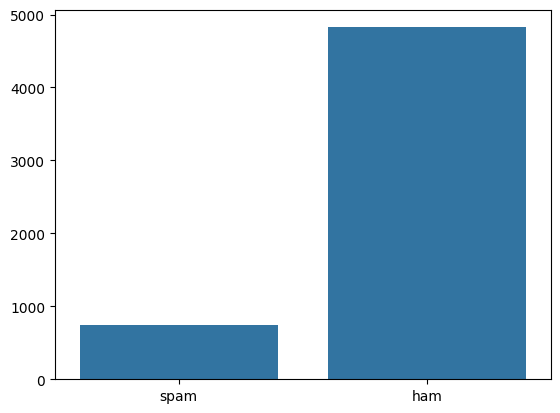

In [23]:
import seaborn as sns

sns.barplot({"spam": len(X[y == "spam"]), "ham": len(X[y == "ham"])})

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

table = []
classifiers = [OneRuleClassifier(), NaiveBiasClassifier(), DecisionTreeClassifier(), KNNClassifier()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    assert y_pred.shape == y_true.shape

    scores = [score(y_true, y_pred) for score in [accuracy_score, f1_score, recall_score, precision_score]]

    row = [str(type(classifier))] + scores

    table.append(row)

/Users/velnbur/Projects/University/data-mining/lab1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from tabulate import tabulate

tabulate(table, headers=["Method", "Accuracy", "F1",  "Recall", "Precision"], tablefmt="html")

Method,Accuracy,F1,Recall,Precision
<class 'classifiers.onerule.OneRuleClassifier'>,0.133768,0.235971,1,0.133768
<class 'classifiers.naivebias.NaiveBiasClassifier'>,0.982055,0.931393,0.910569,0.953191
<class 'classifiers.decisiontree.DecisionTreeClassifier'>,0.866232,0,0,0
<class 'classifiers.knn.KNNClassifier'>,0.930941,0.652055,0.48374,1


## Comparison with sklearn methods

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

y_train = np.where(y_train == "ham", 0.0, 1.0)

vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(X)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

table_sklearn = []
classifiers = [
    DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=100),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(
        #alpha=0, force_alpha=True
    ),
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    scores = [score(y_true, y_pred) for score in [accuracy_score, f1_score, recall_score, precision_score]]

    row = [str(type(classifier))] + scores

    table_sklearn.append(row)

In [38]:
tabulate(table_sklearn, headers=["Method", "Accuracy", "F1",  "Recall", "Precision"], tablefmt="html")

Method,Accuracy,F1,Recall,Precision
<class 'sklearn.tree._classes.DecisionTreeClassifier'>,0.897771,0.443787,0.304878,0.815217
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,0.925503,0.614085,0.443089,1
<class 'sklearn.naive_bayes.MultinomialNB'>,0.978249,0.92126,0.95122,0.89313


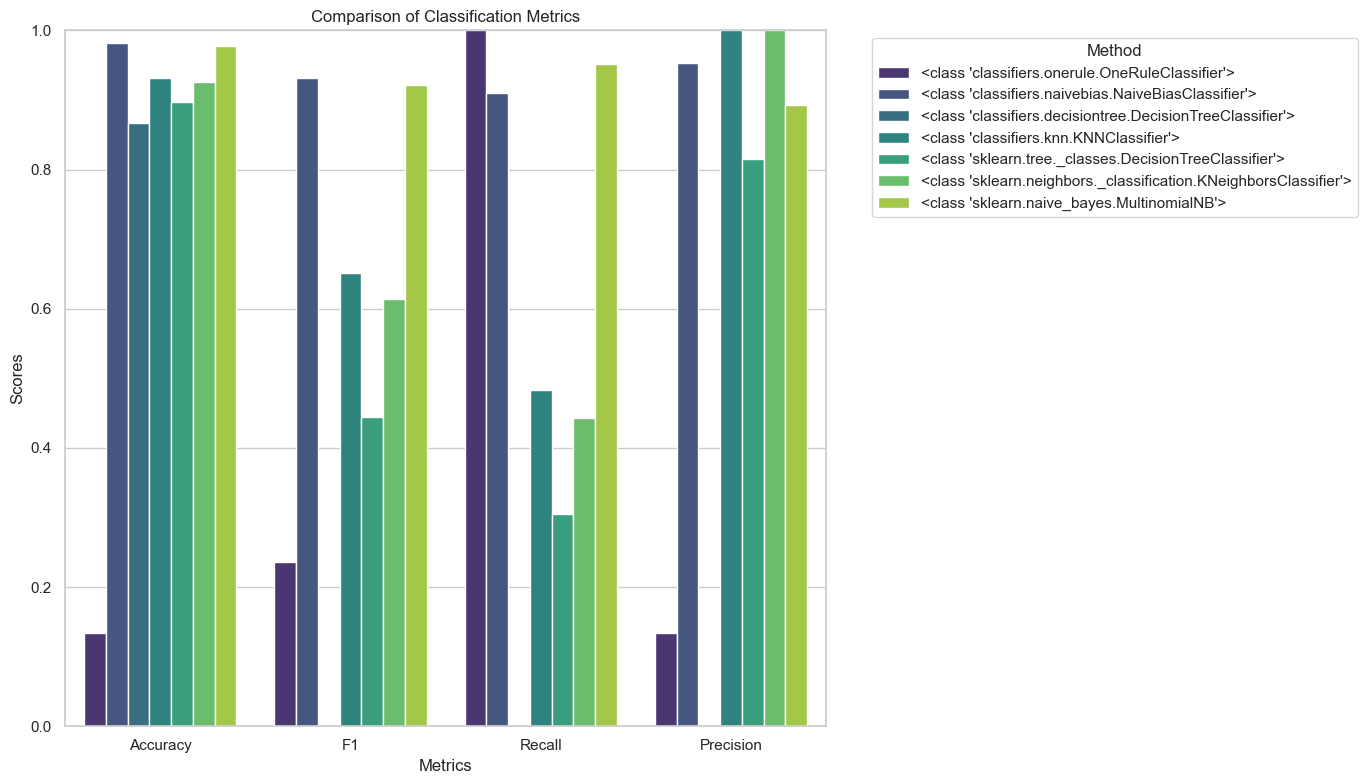

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the results from custom models and sklearn models
data = table + table_sklearn

# Create a DataFrame
df = pd.DataFrame(data, columns=["Method", "Accuracy", "F1", "Recall", "Precision"])

# Melt the DataFrame to make it suitable for seaborn bar plots
df_melted = df.melt(id_vars=["Method"], value_vars=["Accuracy", "F1", "Recall", "Precision"], var_name="Metric", value_name="Score")

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Metric", y="Score", hue="Method", data=df_melted, palette="viridis")

# Add titles and labels
plt.title("Comparison of Classification Metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization

# Show the plot
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


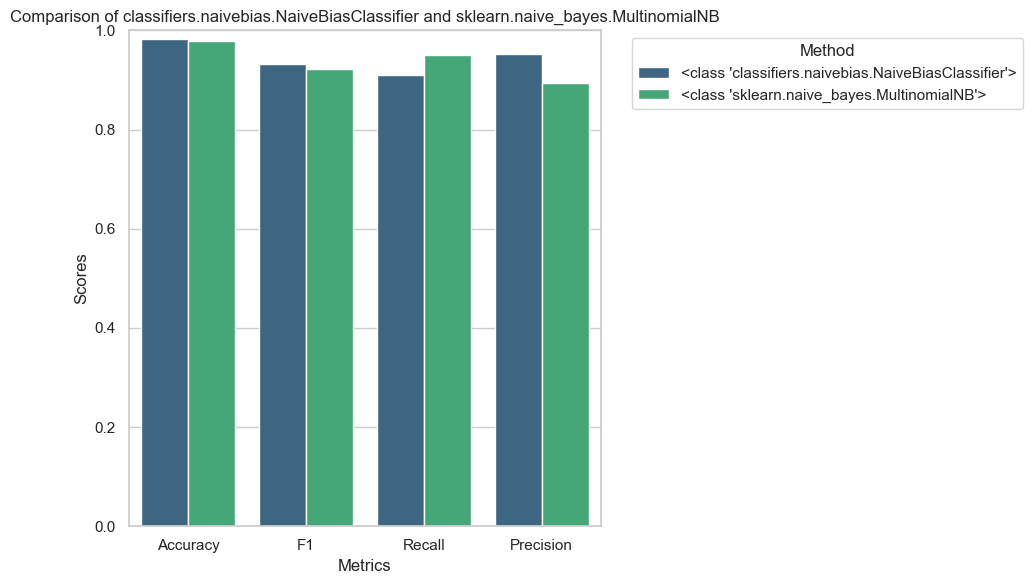

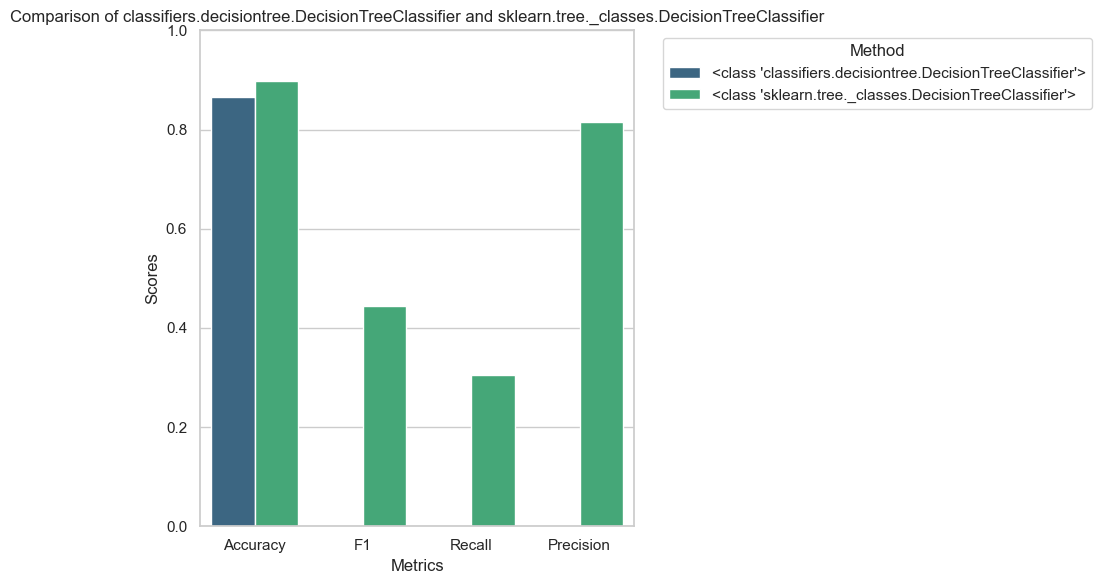

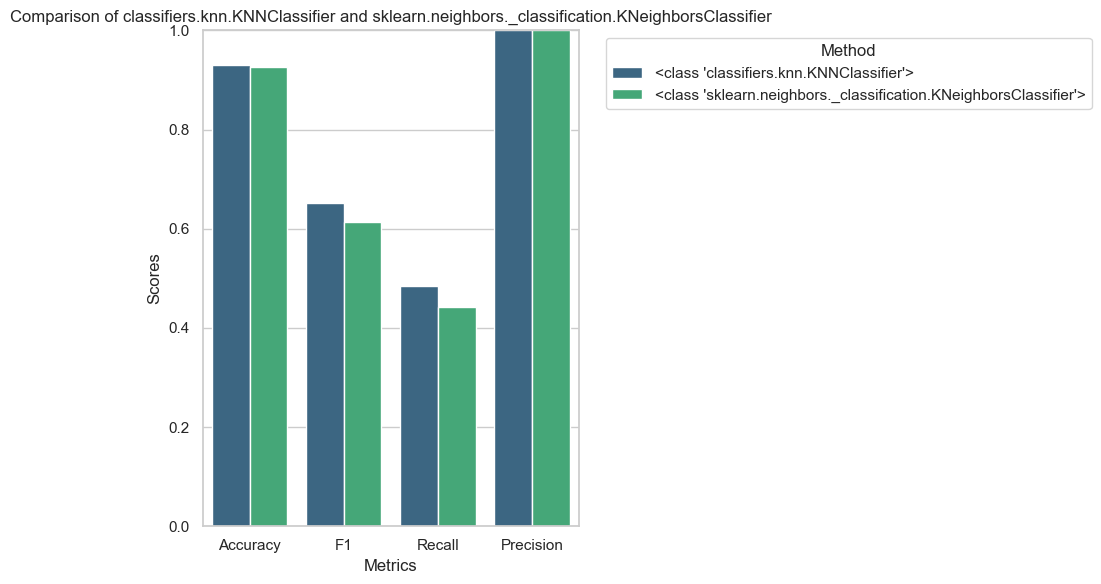

In [43]:
pairs = [
    ("classifiers.naivebias.NaiveBiasClassifier", "sklearn.naive_bayes.MultinomialNB"),
    ("classifiers.decisiontree.DecisionTreeClassifier", "sklearn.tree._classes.DecisionTreeClassifier"),
    ("classifiers.knn.KNNClassifier", "sklearn.neighbors._classification.KNeighborsClassifier")
]

# Plotting function
def plot_comparison(pair, df):
    method1, method2 = pair
    subset = df[df["Method"].str.contains(method1) | df["Method"].str.contains(method2)]

    # Melt the DataFrame to make it suitable for seaborn bar plots
    subset_melted = subset.melt(id_vars=["Method"], value_vars=["Accuracy", "F1", "Recall", "Precision"], var_name="Metric", value_name="Score")

    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Metric", y="Score", hue="Method", data=subset_melted, palette="viridis")

    # Add titles and labels
    plt.title(f"Comparison of {method1} and {method2}")
    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better visualization

    # Show the plot
    plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

for pair in pairs:
    plot_comparison(pair, df)